# Data Exploration and Analysis of NYC Taxi Trips                
#### Yağmur Duman 25133                                                                                                                           

## Data Exploration
### Reading and Printing the File

In [1]:
#importing necessary libraries
import pandas as pd
import reverse_geocoder as rg 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import time
from geopy.distance import great_circle
from scipy import stats
import csv
%matplotlib inline

#reading the file
df = pd.read_csv('/Users/mehmetahkemoglu/Desktop/taxi-trips.csv')

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [2]:
!pip install reverse_geocoder #installing necessary libraries
!pip install geopy #installing necessary libraries
!pip install matplotlib #installing necessary libraries


### Basic information on shape, data types and descriptive statistics that summarize columns

In [3]:
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [4]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


In [5]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


### Creating two new columns: ”pickup district” and ”dropoff district”

In [7]:
pickupcoord= df[["pickup_latitude", "pickup_longitude"]].values
dropoffcoord= df[["dropoff_latitude", "dropoff_longitude"]].values


pickuploc = []
for i in pickupcoord:
    pickuploc.append(tuple(i))
dropoffloc = []
for i in dropoffcoord:
    dropoffloc.append(tuple(i))
        
pickup = rg.search(pickuploc)
dropoff = rg.search(dropoffloc)

Loading formatted geocoded file...


In [8]:
plist = []
for i in pickup:
    plist.append(i["name"])
dlist = []
for j in dropoff:
    dlist.append(j["name"])

df['pickup_district'] = plist
df['dropoff_district'] = dlist

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


### Top 5 districts where passengers prefer to leave and arrive

In [9]:
print( df['pickup_district'].value_counts()[:5])

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


### Creating a new column: ”distance”

In [10]:
distancelist= []
k= 0
while k< df.shape[0]:
    distancelist.append(great_circle(pickuploc[k], dropoffloc[k]).miles)
    k += 1

In [11]:
df["distance"]= distancelist
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023


### Creating a new column: ”time of day”

In [12]:
datetimelist = []
for date in df.pickup_datetime:
    datetimelist.append(date.split())
    
timelist=[]
for p in range (df.shape[0]):
    timelist.append(datetimelist[p][1])

In [13]:
timeofday=[]
count= 0
for h in range (df.shape[0]):
    (h, m, s) = (timelist[h]).split(':')
    decimaltime = int(h) * 3600 + int(m) * 60 + int(s)
    if ((7*3600)<=decimaltime<(9*3600)):
        timeofday.append("rush hour morning")
    elif ((9*3600)<=decimaltime<(16*3600)):
        timeofday.append("afternoon")
    elif ((16*3600)<=decimaltime<(18*3600)):
        timeofday.append("rush hour evening")
    elif ((18*3600)<=decimaltime<(23*3600)):
        timeofday.append("evening")
    elif ((23*3600)<=decimaltime<=(24*3600) or (0<= decimaltime < (7*3600))):
        timeofday.append("late night")
    count+= 1

In [14]:
#print(df.shape[0])
#print(len(timeofday))
df["time_of_day"]= timeofday
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.485830,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.645357,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.453228,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.374282,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.805032,late night


### How does average distance vary as time of the day changes?

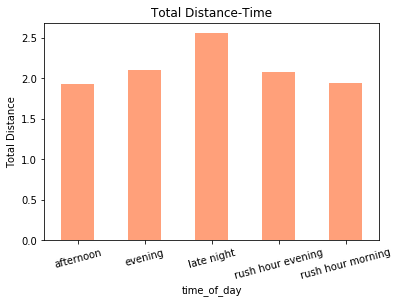

In [15]:
timegroups= df.groupby(['time_of_day']).mean()
total_distance = timegroups["distance"]

ax = total_distance.plot(kind="bar",
                   color="lightsalmon",
                   rot=15)

plt.ylabel("Total Distance")
plt.title("Total Distance-Time")
plt.show()

timegroups= df.groupby(['time_of_day']).mean()
tripduration = timegroups["trip_duration"]

### How does trip duration vary as time of the day changes?

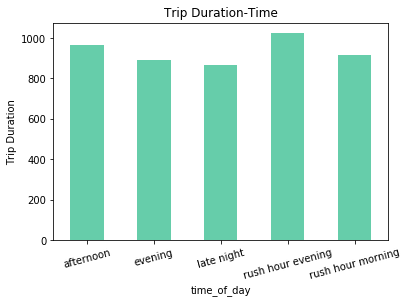

In [16]:
ax2 = tripduration.plot(kind="bar",
                   color="mediumaquamarine",
                   rot=15)

plt.ylabel("Trip Duration")
plt.title("Trip Duration-Time")
plt.show()

## Hypothesis Testing

### Does passenger group size affect the distance?
• Null hypothesis: passenger group size has no effect on the distance.

### Pearson Correlation

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.

(0.005972277211762019, 0.04005815226892839)

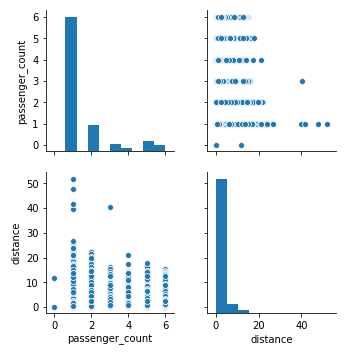

In [17]:
cols = ["passenger_count", "distance"]

sns.pairplot(data=df, vars=cols)

stats.pearsonr(df["passenger_count"], df["distance"])



Correlation coefficient that we obtained 0.0059 states that the correlation between passenger count and distance is not signficant.

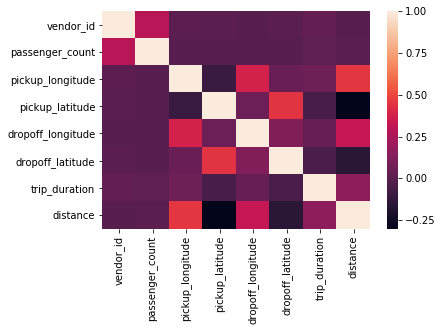

In [18]:
corr = df.corr()  # extract correlations between each column

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

The heat map above shows all of the correlations between each columns.

From this heat map we can say that passenger count and distance are not correlated.

### Do trip distances increase in weekends?
• Null hypothesis: The day of the week has no effect on the distance.

In [19]:
datelist=[]
for l in range (df.shape[0]):
    datelist.append(datetimelist[l][0])

weekdaylist=[]
daylist=[]
for t in range (df.shape[0]):
    day= datetime.strptime(datelist[t] , '%Y-%m-%d').strftime("%A")
    if(day== 'Monday' or day== 'Tuesday' or day== 'Wednesday' or day=='Thursday' or day== 'Friday'):
        weekdaylist.append(day)
        daylist.append("Work")
    elif(day=='Saturday' or day== 'Sunday'):
        weekdaylist.append(day)
        daylist.append("Holiday")
    #strftime("%A")

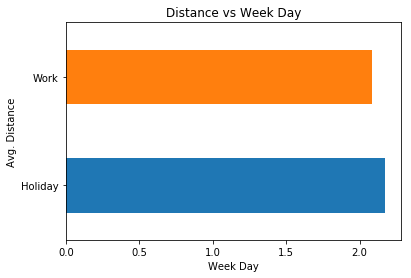

In [20]:
df['week_day'] = daylist
weekgroup = df.groupby(by="week_day").mean()
weekdistance = weekgroup["distance"]

ax3 = weekdistance.plot(kind="barh")

plt.ylabel("Avg. Distance")
plt.xlabel("Week Day")
plt.title("Distance vs Week Day")
plt.show()

From this graph we can't tell much, so to further prove this we can run the ANOVA test.

### Anova (Analysis of Variance)
Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

/Users/mehmetahkemoglu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


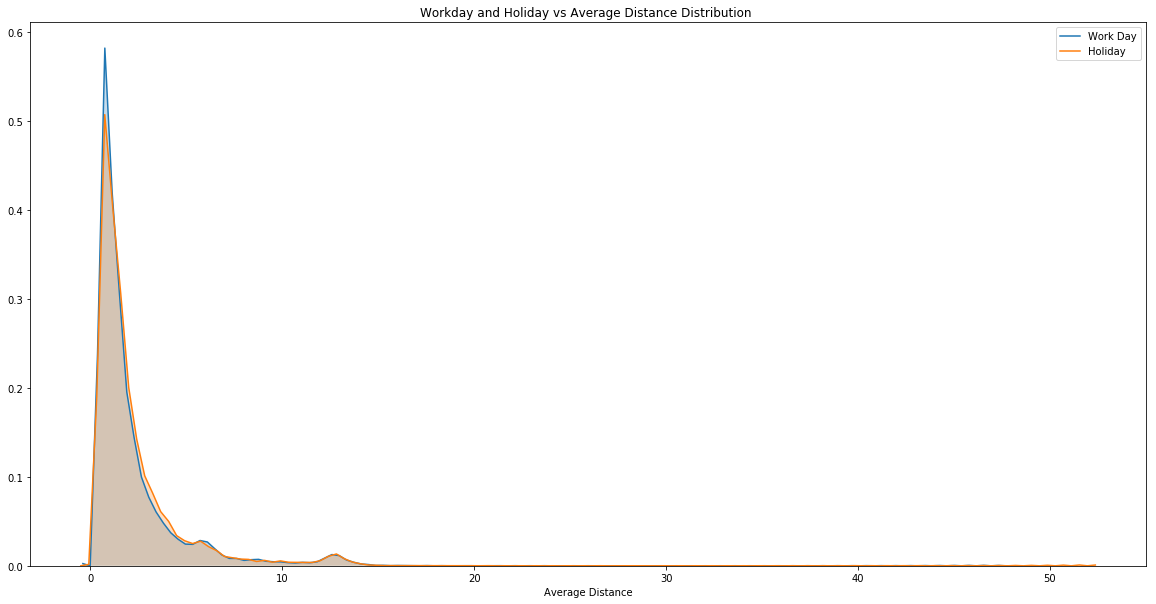

In [21]:
df['day'] = tuple(daylist)
daygroup = df.groupby(by="day").mean()
work = df[df["day"] == "Work"]["distance"]
holiday = df[df["day"] == "Holiday"]["distance"]

fig, ax = plt.subplots(1,1, figsize=(20,10))

sns.kdeplot(work, shade=True, ax=ax, label="Work Day")
sns.kdeplot(holiday, shade=True, ax=ax, label="Holiday")

plt.xlabel("Average Distance")
plt.title("Workday and Holiday vs Average Distance Distribution ")
plt.show()

In [22]:
stats.f_oneway(work, holiday)

F_onewayResult(statistic=31.4326781024453, pvalue=2.0693550758912806e-08)

If we set significance value as 0.05, then we can reject the null hypothesis and say that day of the week has an effect on distance.